# Analysis of Best and Worst 50 rated movies on IMDB

## Table of Contents
### 1.Introduction
### 2. Libraries
### 3.Web Scraping
### 4.Data Formatting and Data Analysis 
### 5.Visualization
### 6.Conclusion

### 1. Introduction
Considering myself to be a cinephilic or a movie buff, I really wanted to figure out what goes into making a movie great or dumb. My choice of watching a movie being filtered out through rating of the movie on IMDB. IMDB is a movie database website where any person can vote on any movie on a scale 1-10. And is a pretty good indicator of how good a movie is.<br> 
<br>Thus, browsing IMDB website, I came across a Top 250 Movies of all time list and similarly gathered that there would be a Worst 250 Movies of all time list. This list is usually sorted using the average movie rating and the number of ratings each movie. IMDB has it's own algorithm to decide the ranking supposing internet trolls decide to make fake accounts and try to increase the rating of a movie. This algorithm is classified.<br> 
<br>Therefore being a budding Data Scientist, I had to explore the corresponding dataset. For this project I took the top and worst 50 movies, considering the data related was pretty similar and corresponding data analysis was done on the list's features.

### 2. Libraries

<b>Beatiful Soup</b>, <b>requests</b> - Used to scrape website for information.  
<b>Pandas</b> - Provides dataframe to store and analyze the data.  
<b>Matplotlib</b> - Used to plot graphs.  
<b>Seaborn</b> - Library built on matplotlib, for more advanced plot graphs.


In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='Scraping'></a>

### 3. Web Scraping

<b>Web Scraping</b> is the process of extracting elements of a website as it is. This saves us the tiresome task of manually filling in data in a table.<br> 
<br><b>Requests</b> is an HTTP library, written for Python. It has a basic GET method, which is used to get data from the website. In our project we use the 'text' method to get all the HTML code of the webpage in a text format. <br><br><b>BeautifulSoup</b> is a python library which analyses the HTML parsetree. We use BeautifulSoup's 'select' method to select the specific data linked with that HTML tag. Then we scrap details of the movie title, year released, average rating, number of votes, running time, certificate, genre.

In [2]:
# IMDB top and bottom 50 URL
responseTopFifty = requests.get('https://www.imdb.com/search/title/?groups=top_250&sort=user_rating,desc')
responseBotFifty = requests.get('https://www.imdb.com/search/title/?groups=bottom_250&lists=!watchlist&sort=user_rating,asc')
soupTopFifty = BeautifulSoup(responseTopFifty.text,"html.parser")
soupBottomFifty = BeautifulSoup(responseBotFifty.text,"html.parser")

In [3]:
# Here we are individually collecting the features of each movie.
movies = [a.get_text() for a in soupTopFifty.select('h3.lister-item-header a')]
movies = movies + [a.get_text() for a in soupBottomFifty.select('h3.lister-item-header a')]
year_reqTF = soupTopFifty.select('h3.lister-item-header span')
year = []


for index in range(50):
    year.append(year_reqTF[index *2 + 1].get_text().replace('(','').replace(')',''))
    
'''Sample all the odd indexed values which contain the year because the even indexed values contain string for a 
different value'''

year_reqBF = soupBottomFifty.select('h3.lister-item-header span')


for index in range(50):
    year.append(year_reqBF[index *2 + 1].get_text().replace('(','').replace(')',''))
    
'''Sample all the odd indexed values which contain the year because the even indexed values contain string 
for a different value'''
    
rating = [a.get_text() for a in soupTopFifty.select('div.ratings-bar strong')]
rating = rating + [a.get_text() for a in soupBottomFifty.select('div.ratings-bar strong')]

votes = [a.attrs.get('data-value').replace(',','') for a in soupTopFifty.select('p.sort-num_votes-visible span[name=nv]')]
votes = votes + [a.attrs.get('data-value').replace(',','') for a in soupBottomFifty.select('p.sort-num_votes-visible span[name=nv]')]

runningTime = [a.get_text().replace(' min','') for a in soupTopFifty.select('span.runtime')]
runningTime = runningTime + [a.get_text().replace(' min','') for a in soupBottomFifty.select('span.runtime')]
genre = [a.get_text().replace(' ','').split(',') for a in soupTopFifty.select('span.genre')]
genre = genre + [a.get_text().replace(' ','').split(',') for a in soupBottomFifty.select('span.genre')]

<a id='DA'></a>

### 4. Data Formating and Data Analysis
After scraping the webpage of necessary data, we need to store it in a format which is easy to analyse and operate on. This will be done in the next few steps.<br>
   First we take the feature data which is stored in separate lists, one list for each feature. Then create a dictionary where the keys of dictionary are features and values are respective feature values. Then this python dictionary is converted to a Pandas dataframe.<br> We use Pandas mainly because it allows various data manipulation operations and it is also easy to visualise a dataframe for analysis.<br>
Using the 'head' function of pandas we notice that each movie is described under more than one Genre. We solve this problem by randomly selecting a genre for each movie under the list of genres the movie is decribed. This is done using the 'pop' function of the list. Which pops the top most item from the list.<br>
 Then we create a column that describes whether the movies is in the best 50 or worst 50 list.



In [4]:
# Converting all the features we have into a dictionary.

In [5]:
imdb = []
for index in range(100):
    data = {"Movie": movies[index],
            "Year": year[index],
            "Rating": rating[index],
            "Vote": votes[index],
            "RunningTime" : runningTime[index],
            "Genre" : genre[index]}
    imdb.append(data)

In [24]:
# Converting from dictionary to pandas dataframe
imdb = pd.DataFrame.from_dict(imdb)
imdb['Genre'] = imdb['Genre'].apply(lambda x: x[0].replace('\n','')) # Select a Genre

#converting from string to an integer
imdb['RunningTime'] = imdb['RunningTime'].apply(lambda x: int(x))
imdb['Vote'] = imdb['Vote'].apply(lambda x: int(x))
imdb.head()

,Genre,Movie,Rating,RunningTime,Vote,Year,Category
0,D,The Shawshank Redemption,9.3,142,2176791,1994,Top
1,C,The Godfather,9.2,175,28341469,1972,Top
2,A,The Dark Knight,9.0,152,1499612,2008,Top
3,C,The Godfather: Part II,9.0,202,134966411,1974,Top
4,A,The Lord of the Rings: The Return of the King,8.9,201,2160500,2003,Top


In [7]:
# Categorize the movies into top and bottom fifty.
imdb['Category'] = imdb['Rating'].apply(lambda row: 'Top' if float(row) > 5 else 'Bottom')
imdb.head()

,Genre,Movie,Rating,RunningTime,Vote,Year,Category
0,Drama,The Shawshank Redemption,9.3,142,2176791,1994,Top
1,Crime,The Godfather,9.2,175,28341469,1972,Top
2,Action,The Dark Knight,9.0,152,1499612,2008,Top
3,Crime,The Godfather: Part II,9.0,202,134966411,1974,Top
4,Adventure,The Lord of the Rings: The Return of the King,8.9,201,2160500,2003,Top


### 5. Visualisation
<b>Data Visualization</b> is presentation of data in a pictorial form such that we can discover hidden patterns in the data. Here we try to compare each feature of the dataframe for both the categories and we find very contrasting views about each category.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Certificate'),
 Text(0.5, 1.0, 'Certificate by top and bottom 50 movies')]

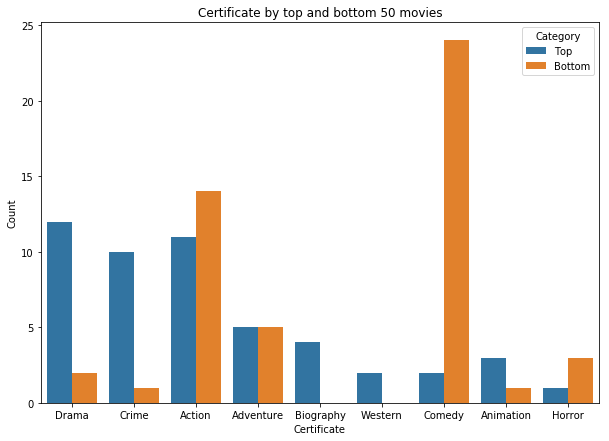

In [8]:
fig, axes = plt.subplots(figsize = (10,7))
ax = sns.countplot(x = 'Genre', hue ='Category', data = imdb)
ax.set(title = 'Certificate by top and bottom 50 movies',xlabel = 'Certificate', ylabel='Count')

We can also see that the movies described under 'Biography' genre are likely to be 100% liked by people. People also seem to like 'Drama' and 'Crime'. The same cannot be said about other genres like 'Comedy' and 'Horror', with most of the worst movies described under these. The reviews for 'Action' and 'Adventure' genres seems to be mixed. 

[Text(17.200000000000017, 0.5, 'Ranking'),
 Text(0.5, 17.200000000000003, 'Running Time'),
 Text(0.5, 1.0, 'Running Time of top and bottom 50 movies')]

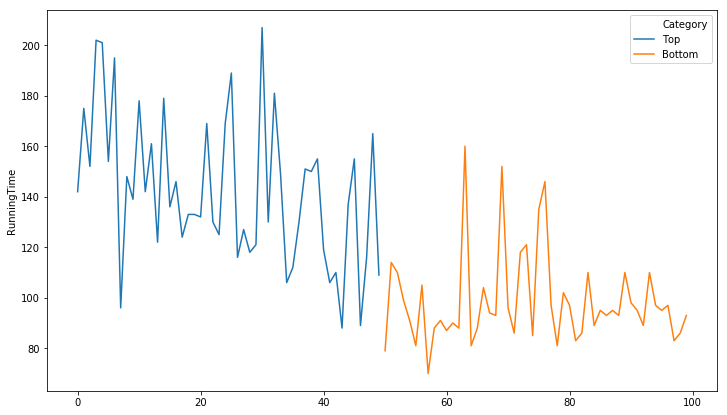

In [19]:
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(data=imdb, x=imdb.index, y='RunningTime', hue='Category')
ax.set(title = 'Running Time of top and bottom 50 movies',xlabel = 'Running Time', ylabel='Ranking')

We can notice that most of the bottom 50 movies have comparitively less running time


In the above graph, we can see usually the worst rated movies have running time less than 100 minutes. So the key to making a better movie also lies in having more than 100 minutes of time."

Thus, we can conclude from this project that most of the features related in the IMDb site are relevant to figure out the quality of a movie. Of course just getting these features does not mean the movie you make could be in the top 50 movies list but it could at least decrease the probabilities of it being in the worst 50.

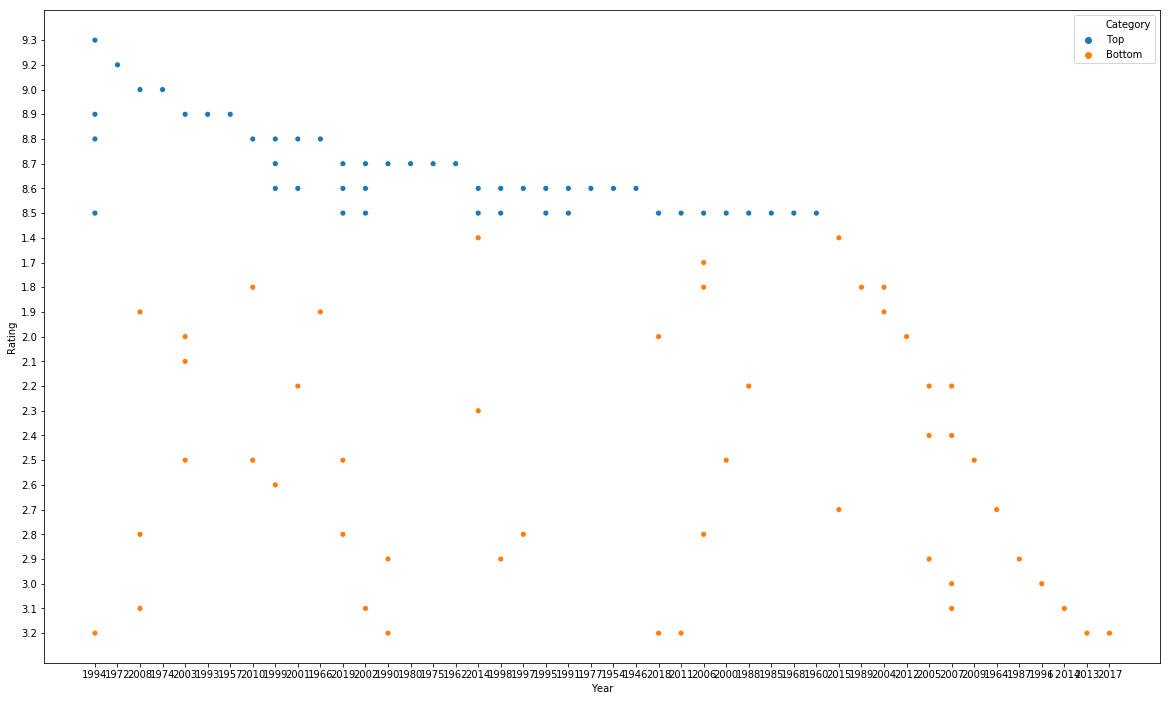

In [17]:
fig, axes = plt.subplots(figsize = (20,12))
ax = sns.scatterplot(x="Year", y="Rating", hue="Category",data=imdb)
ax.invert_yaxis()

From the above plot we see the movies are equally distributed irrespective of the year they were released in, so concluding that year they were released is not relevant for the movie to be good.

[Text(17.200000000000017, 0.5, 'Ranking'),
 Text(0.5, 17.200000000000003, 'Votes'),
 Text(0.5, 1.0, 'Votes')]

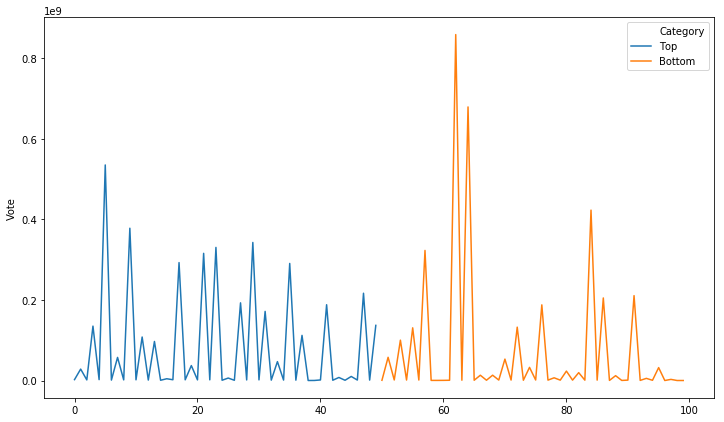

In [32]:
fig, axes = plt.subplots(figsize = (12,7))
sns.lineplot(data=imdb, x=imdb.index, y='Vote', hue='Category')
ax.set(title = 'Votes',xlabel = 'Votes', ylabel='Ranking')

The above plot shows a normalized version of the number of votes for all the movies. We can see the votes are distributed, which implies that votes for most of the movies are mostly equal whether they belong to the top or bottom 50 categories.

### 6. Conclusion
 We saw how data was scraped directly from the IMDB website, then the scrapped data was formatted into a Pandas dataframe and we visualized different features of the data and we can conclude that to make a good film the Genre and the Running Time is important.